In [1]:
# Call the relevant python packages
import numpy as np
import pandas as pd
import glob, os                          # Operating system module and pathnames

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord


# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Output plots in Notebook
#%matplotlib notebook
%matplotlib inline  

# Table setup

In [2]:
# Read in the catalogue

file = 'NGC6822_Spitzer_JHK.csv'
data = ascii.read(file, data_start=1)

#adds criteria columns to table
#inidivual criteria
data['c1a']=0
data['c1b']=0
data['c1c']=0
data['c2a']=0
data['c2b']=0
data['c2c']=0
data['c3a']=0
data['c3b']=0
data['c3c']=0
data['c4a']=0
data['c4b']=0
data['c5a']=0
data['c5b']=0
data['c5c']=0
data['c6a']=0
data['c6b']=0
data['c6c']=0
data['c7']=0
data['c8']=0
data['c9a']=0
data['c9b']=0
data['c9c']=0

#any of the inidividual - e.g. c1a=1, c1b=0, c1c=0 ==> c1=1
data['c1']=0
data['c2']=0
data['c3']=0
data['c4']=0
data['c5']=0
data['c6']=0
data['c9']=0
data['c10']=0

#number of Spitzer data (0-5)
data['24 data?']=0
data['36 data?']=0
data['45 data?']=0
data['58 data?']=0
data['80 data?']=0
data['SpNum']=0

#number of HJK data (0-3)
data['H data?']=0
data['J data?']=0
data['K data?']=0
data['HJKNum']=0



#print column names
data.colnames






#define colour and magntitude criteria
err=0.5 #maximum allowed errors for sources to be considered
mod=4.29 #difference in distance moduli between SMC and NGC 6822

def write_column(crit,name):
    print("Number of stars in cut "+name+": {}".format(len(crit[0])))
    for i in range(len(crit[0])):
        #writes '1' to cell where condition is met
        #'0' is the default
        data[name][crit[0][i]]=1
        

        
#CCD/CMD cuts - creates an indexed catalogue of sources meeting the criteria
#sources are only added if their errors are in between 0 and the value <err> defined above
c1a_idx=np.where((data['Hmag']-data['Kmag']<1.1674*(data['Kmag']-data['k45mag'])-0.5240) & (data['eHmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eHmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1a_idx,'c1a')

c1b_idx=np.where((data['Jmag']-data['Kmag']<1*(data['Jmag']-data['k45mag'])-0.4196) & (data['eJmag']<err) & (data['eKmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eKmag']>0) & (data['e45mag']>0))
write_column(c1b_idx,'c1b')

c1c_idx=np.where((data['Jmag']-data['Hmag']<1.0758*(data['Hmag']-data['k45mag'])-0.2997) & (data['eJmag']<err) & (data['eHmag']<err) & (data['e45mag']<err)&(data['eJmag']>0) & (data['eHmag']>0) & (data['e45mag']>0))
write_column(c1c_idx,'c1c')

c2a_idx=np.where((data['k36mag']<13.2+mod) & (data['k36mag']-data['k58mag']>=2.1) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2a_idx,'c2a')

c2b_idx=np.where((11+mod<data['k36mag'])&(data['k36mag']<13.2+mod) & (0.8<=data['k36mag']-data['k58mag'])&(data['k36mag']-data['k58mag']<=2.1) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2b_idx,'c2b')

c2c_idx=np.where((data['k36mag']>13.2+mod) & (data['k36mag']-data['k58mag']>3.0) & (data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']<err) & (data['e58mag']<err)&(data['e36mag']>0) & (data['e58mag']>0))
write_column(c2c_idx,'c2c')

c3a_idx=np.where((data['k45mag']<=12.5+mod) & (data['k45mag']-data['k58mag']>=1.1) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3a_idx,'c3a')

c3b_idx=np.where((data['k45mag']<12.5+mod)&(0.5<data['k45mag']-data['k58mag']) & (data['k45mag']-data['k58mag']<=1.1) & (data['k45mag']>11.33-1.67*(data['k45mag']-data['k58mag'])+mod) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3b_idx,'c3b')

c3c_idx=np.where((data['k45mag']>12.5+mod) & (data['k45mag']<7+5*(data['k45mag']-data['k58mag'])+mod) & (data['e45mag']<err) & (data['e58mag']<err)&(data['e45mag']>0) & (data['e58mag']>0))
write_column(c3c_idx,'c3c')

c4a_idx=np.where((data['k80mag']<10.7+mod) & (data['k45mag']-data['k80mag']>2.0) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4a_idx,'c4a')

c4b_idx=np.where((1.0<data['k45mag']-data['k80mag']) & (data['k45mag']-data['k80mag']<=2.0) & (data['k80mag']<12.7-(data['k45mag']-data['k80mag'])+mod) & (data['k80mag']>11.3-1.8*(data['k45mag']-data['k80mag'])+mod) & (data['e45mag']<err) & (data['e80mag']<err)&(data['e45mag']>0) & (data['e80mag']>0))
write_column(c4b_idx,'c4b')

c5a_idx=np.where((data['k45mag']<=12.2+mod) & (data['k45mag']-data['k24mag']>=4.0) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5a_idx,'c5a')

c5b_idx=np.where((data['k45mag']<12.2+mod) & (3.2<data['k45mag']-data['k24mag']) & (data['k45mag']-data['k24mag']<=4.0) & (data['k45mag']>15-1.25*(data['k45mag']-data['k24mag'])) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5b_idx,'c5b')

c5c_idx=np.where((data['k45mag']>12.2+mod) & (data['k45mag']<6.43+1.03*(data['k45mag']-data['k24mag'])+mod) & (data['e45mag']<err) & (data['e24mag']<err)&(data['e45mag']>0) & (data['e24mag']>0))
write_column(c5c_idx,'c5c')

c6a_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']>=2.7) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6a_idx,'c6a')

c6b_idx=np.where((data['k80mag']<10+mod) & (data['k80mag']-data['k24mag']<=2.7) & (data['k80mag']>12.5-1.67*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6b_idx,'c6b')

c6c_idx=np.where((data['k80mag']>=10+mod) & (data['k80mag']<5.27+1.09*(data['k80mag']-data['k24mag'])+mod) & (data['e80mag']<err) & (data['e24mag']<err)&(data['e80mag']>0) & (data['e24mag']>0))
write_column(c6c_idx,'c6c')

#note | symbol is equivalent to <or>
c7_idx=np.where((data['k36mag']-data['k45mag']>=0.2) & ((data['k36mag']<=13.3)|(data['k36mag']<=8.7+4*(data['k36mag']-data['k45mag'])+mod)) & (data['e36mag']<err) & (data['e45mag']<err)&(data['e36mag']>0) & (data['e45mag']>0))
write_column(c7_idx,'c7')

c8_idx=np.where((data['Hmag']-data['Kmag']>0.0) & (data['Hmag']-data['Kmag']>0.9-1.7*(data['k36mag']-data['k45mag'])) & (data['Hmag']-data['Kmag']<-0.85+3.44*(data['k36mag']-data['k45mag'])) & (data['e36mag']<err) & (data['e45mag']<err) & (data['eHmag']<err) & (data['eKmag']<err)&(data['e36mag']>0) & (data['e45mag']>0) & (data['eHmag']>0) & (data['eKmag']>0))
write_column(c8_idx,'c8')


#NB c9 has been taken from cuts on NGC 6822 so no need for <mod>
c9a_idx=np.where((data['k36mag']-data['k80mag']>=2.5) & (data['k80mag']<12.5) & (data['e36mag']<err) & (data['e80mag']<err) &(data['e36mag']>0) & (data['e80mag']>0))
write_column(c9a_idx,'c9a')

c9b_idx=np.where((data['k80mag']>=12.5) & (data['k80mag']<=14.7) & (data['k80mag']>-2.2*(data['k36mag']-data['k80mag'])+18) & (data['e80mag']<err) & (data['e36mag']<err)&(data['e80mag']>0) & (data['e36mag']>0))
write_column(c9b_idx,'c9b')

c9c_idx=np.where((data['k80mag']<0.2*(data['k36mag']-data['k80mag'])+14.4) & (data['k80mag']>14.7) & (data['k80mag']<=16) & (data['e36mag']<err) & (data['e80mag']<err) &(data['e36mag']>0) & (data['e80mag']>0))
write_column(c9c_idx,'c9c')

c10_idx=np.where((data['Kmag']-data['k36mag']<1.1674*(data['k36mag']-data['k45mag'])-0.5240) & (data['eKmag']<err) & (data['e36mag']<err) & (data['e45mag']<err)&(data['eKmag']>0) & (data['e36mag']>0) & (data['e45mag']>0))
write_column(c10_idx,'c10')


#add columns of the inidvidual cut conditions together
#entries in this column are the number of these conditions met
data['c1']=data['c1a']+data['c1b']+data['c1c']
data['c2']=data['c2a']+data['c2b']+data['c2c']
data['c3']=data['c3a']+data['c3b']+data['c3c']
data['c4']=data['c4a']+data['c4b']
data['c5']=data['c5a']+data['c5b']+data['c5c']
data['c6']=data['c6a']+data['c6b']+data['c6c']
data['c9']=data['c9a']+data['c9b']+data['c9c']

#create indices for any sources that meet the numbered conditions
c1_idx=np.where(data['c1']>0)
c2_idx=np.where(data['c2']>0)
c3_idx=np.where(data['c3']>0)
c4_idx=np.where(data['c4']>0)
c5_idx=np.where(data['c5']>0)
c6_idx=np.where(data['c6']>0)
c9_idx=np.where(data['c9']>0)

#print number of sensible (low error) sources in cuts
print("Number of stars in cut c1: {}".format(len(c1_idx[0])))
print("Number of stars in cut c2: {}".format(len(c2_idx[0])))
print("Number of stars in cut c3: {}".format(len(c3_idx[0])))
print("Number of stars in cut c4: {}".format(len(c4_idx[0])))
print("Number of stars in cut c5: {}".format(len(c5_idx[0])))
print("Number of stars in cut c6: {}".format(len(c6_idx[0])))
print("Number of stars in cut c9: {}".format(len(c9_idx[0])))

Number of stars in cut c1a: 1890
Number of stars in cut c1b: 3093
Number of stars in cut c1c: 1519
Number of stars in cut c2a: 88
Number of stars in cut c2b: 1355
Number of stars in cut c2c: 90
Number of stars in cut c3a: 111
Number of stars in cut c3b: 711
Number of stars in cut c3c: 4359
Number of stars in cut c4a: 567
Number of stars in cut c4b: 848
Number of stars in cut c5a: 849
Number of stars in cut c5b: 324
Number of stars in cut c5c: 925
Number of stars in cut c6a: 355
Number of stars in cut c6b: 85
Number of stars in cut c6c: 326
Number of stars in cut c7: 222
Number of stars in cut c8: 221
Number of stars in cut c9a: 59
Number of stars in cut c9b: 477
Number of stars in cut c9c: 131
Number of stars in cut c10: 246
Number of stars in cut c1: 4003
Number of stars in cut c2: 1533
Number of stars in cut c3: 5181
Number of stars in cut c4: 1415
Number of stars in cut c5: 2092
Number of stars in cut c6: 766
Number of stars in cut c9: 667


In [3]:
#print column names
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag',
 'c1a',
 'c1b',
 'c1c',
 'c2a',
 'c2b',
 'c2c',
 'c3a',
 'c3b',
 'c3c',
 'c4a',
 'c4b',
 'c5a',
 'c5b',
 'c5c',
 'c6a',
 'c6b',
 'c6c',
 'c7',
 'c8',
 'c9a',
 'c9b',
 'c9c',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c9',
 'c10',
 '24 data?',
 '36 data?',
 '45 data?',
 '58 data?',
 '80 data?',
 'SpNum',
 'H data?',
 'J data?',
 'K data?',
 'HJKNum']

Note null values in the IRAC and MIPS data are given as -9999.0

Nulll values in the JHK section were given as null initially.

These have been made consistent with each other to make life easier later on.


In [122]:
# If you want to examine the catalogue in browser
data.show_in_browser(jsviewer=True)

In [4]:
# Select sources that have MIPS [24] data & Also mask out sources with large errors ie >0.2
#First index is array of booleans
#Second index is array of indices in the catalogue
MIPS24_idx = ((data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
MIPS24_cat = data[MIPS24_idx]
idx_24=np.where(MIPS24_idx)
#print("Number of stars with [24] data: {}".format(len(idx_24[0])))
write_column(idx_24,'24 data?')

CMD36_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < 0.2) & (data['e36mag'] > 0.0)) 
CMD36_cat = data[CMD36_idx]
idx_36=np.where(CMD36_idx)
#print("Number of stars with [3.6] data: {}".format(len(idx_36[0])))
write_column(idx_36,'36 data?')

CMD45_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < 0.2) & (data['e45mag'] > 0.0)) 
CMD45_cat = data[CMD45_idx]
idx_45=np.where(CMD45_idx)
#print("Number of stars with [4.5] data: {}".format(len(idx_45[0])))
write_column(idx_45,'45 data?')

CMD58_idx = ((data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD58_cat = data[CMD58_idx]
idx_58=np.where(CMD58_idx)
#print("Number of stars with [5.8] data: {}".format(len(idx_58[0])))
write_column(idx_58,'58 data?')

CMD80_idx = ((data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD80_cat = data[CMD80_idx]
idx_80=np.where(CMD80_idx)
#print("Number of stars with [8.0] data: {}".format(len(idx_80[0])))
write_column(idx_80,'80 data?')

CCDH_idx = ((data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)) 
CCDH_cat = data[CCDH_idx]
idx_H=np.where(CCDH_idx)
#print("Number of stars with H data: {}".format(len(idx_H[0])))
write_column(idx_H,'H data?')

CCDJ_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)) 
CCDJ_cat = data[CCDJ_idx]
idx_J=np.where(CCDJ_idx)
#print("Number of stars with J data: {}".format(len(idx_J[0])))
write_column(idx_J,'J data?')

CCDK_idx = ((data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)) 
CCDK_cat = data[CCDK_idx]
idx_K=np.where(CCDK_idx)
#print("Number of stars with K data: {}".format(len(idx_K[0])))
write_column(idx_K,'K data?')


#add columns of the inidvidual filter conditions together
#entries in this column are the number of these conditions met
data['SpNum']=data['24 data?']+data['36 data?']+data['45 data?']+data['58 data?']+data['80 data?']
data['HJKNum']=data['H data?']+data['J data?']+data['K data?']


#add columns of the number of Spitzer data together
idx_Sp0of5=np.where(data['SpNum']==0)
print("Number of stars with no Spitzer data: {}".format(len(idx_Sp0of5[0])))
idx_Sp1of5=np.where(data['SpNum']==1)
print("Number of stars with 1 of 5 Spitzer data: {}".format(len(idx_Sp1of5[0])))
idx_Sp2of5=np.where(data['SpNum']==2)
print("Number of stars with 2 of 5 Spitzer data: {}".format(len(idx_Sp2of5[0])))
idx_Sp3of5=np.where(data['SpNum']==3)
print("Number of stars with 3 of 5 Spitzer data: {}".format(len(idx_Sp3of5[0])))
idx_Sp4of5=np.where(data['SpNum']==4)
print("Number of stars with 4 of 5 Spitzer data: {}".format(len(idx_Sp4of5[0])))
idx_Sp5of5=np.where(data['SpNum']==5)
print("Number of stars with 5 of 5 Spitzer data: {}".format(len(idx_Sp5of5[0])))

idx_HJK0of3=np.where(data['HJKNum']==0)
print("Number of stars with no HJK data: {}".format(len(idx_HJK0of3[0])))
idx_HJK1of3=np.where(data['HJKNum']==1)
print("Number of stars with 1 of 3 HJK data: {}".format(len(idx_HJK1of3[0])))
idx_HJK2of3=np.where(data['HJKNum']==2)
print("Number of stars with 2 of 3 HJK data: {}".format(len(idx_HJK2of3[0])))
idx_HJK3of3=np.where(data['HJKNum']==3)
print("Number of stars with 3 of 3 HJK data: {}".format(len(idx_HJK3of3[0])))

Number of stars in cut 24 data?: 7268
Number of stars in cut 36 data?: 29931
Number of stars in cut 45 data?: 27814
Number of stars in cut 58 data?: 23906
Number of stars in cut 80 data?: 20414
Number of stars in cut H data?: 14406
Number of stars in cut J data?: 13742
Number of stars in cut K data?: 14142
Number of stars with no Spitzer data: 135
Number of stars with 1 of 5 Spitzer data: 814
Number of stars with 2 of 5 Spitzer data: 3523
Number of stars with 3 of 5 Spitzer data: 8309
Number of stars with 4 of 5 Spitzer data: 13274
Number of stars with 5 of 5 Spitzer data: 4690
Number of stars with no HJK data: 16211
Number of stars with 1 of 3 HJK data: 0
Number of stars with 2 of 3 HJK data: 1312
Number of stars with 3 of 3 HJK data: 13222


In [5]:
# Create catalogues of reliable sources
#reliable Spitzer is 3,4 or 5 out of 5
#reliable HJK is 2,3 out of 3

reliable_sp_idx=((data['SpNum']>=3))
reliable_sp_cat=data[reliable_sp_idx]
rel_sp_total=len(np.where(reliable_sp_idx)[0])
print("There are "+str(rel_sp_total)+" reliable stars for Spitzer ("+str(rel_sp_total/30745)+"%)")

reliable_HJK_idx=((data['HJKNum']>=2) & (data['45 data?']==1) & (data['36 data?']==1))
reliable_HJK_cat=data[reliable_HJK_idx]
rel_HJK_total=len(np.where(reliable_HJK_idx)[0])
print("There are "+str(rel_HJK_total)+" reliable stars for HJK ("+str(rel_HJK_total/30745)+"%)")


#uncomment below to view the reliable Spitzer and HJK catalogues
#reliable_sp_cat.show_in_browser(jsviewer=True)
#reliable_HJK_cat.show_in_browser(jsviewer=True)

There are 26273 reliable stars for Spitzer (0.8545454545454545%)
There are 14247 reliable stars for HJK (0.4633924215319564%)


reliable Spitzer ~85%
reliable HJK ~46%

In [7]:
#create indices for sources meeting the cuts in the reliable catalogues
c1a_rel_sp_idx=np.where(reliable_sp_cat['c1a']>0)
c1b_rel_sp_idx=np.where(reliable_sp_cat['c1b']>0)
c1c_rel_sp_idx=np.where(reliable_sp_cat['c1c']>0)
c1_rel_sp_idx=np.where(reliable_sp_cat['c1']>0)
c2_rel_sp_idx=np.where(reliable_sp_cat['c2']>0)
c3_rel_sp_idx=np.where(reliable_sp_cat['c3']>0)
c4_rel_sp_idx=np.where(reliable_sp_cat['c4']>0)
c5_rel_sp_idx=np.where(reliable_sp_cat['c5']>0)
c6_rel_sp_idx=np.where(reliable_sp_cat['c6']>0)
c7_rel_sp_idx=np.where(reliable_sp_cat['c7']>0)
c8_rel_sp_idx=np.where(reliable_sp_cat['c8']>0)
c9_rel_sp_idx=np.where(reliable_sp_cat['c9']>0)
c10_rel_sp_idx=np.where(reliable_sp_cat['c10']>0)
print("Number of RELIABLE (SPITZER) stars in cut c1a: {}".format(len(c1a_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c1b: {}".format(len(c1b_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c1c: {}".format(len(c1c_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c1: {}".format(len(c1_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c2: {}".format(len(c2_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c3: {}".format(len(c3_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c4: {}".format(len(c4_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c5: {}".format(len(c5_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c6: {}".format(len(c6_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c7: {}".format(len(c7_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c8: {}".format(len(c8_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c9: {}".format(len(c9_rel_sp_idx[0])))
print("Number of RELIABLE (SPITZER) stars in cut c10: {}".format(len(c10_rel_sp_idx[0])))

c1a_rel_HJK_idx=np.where(reliable_HJK_cat['c1a']>0)
c1b_rel_HJK_idx=np.where(reliable_HJK_cat['c1b']>0)
c1c_rel_HJK_idx=np.where(reliable_HJK_cat['c1c']>0)
c1_rel_HJK_idx=np.where(reliable_HJK_cat['c1']>0)
c2_rel_HJK_idx=np.where(reliable_HJK_cat['c2']>0)
c3_rel_HJK_idx=np.where(reliable_HJK_cat['c3']>0)
c4_rel_HJK_idx=np.where(reliable_HJK_cat['c4']>0)
c5_rel_HJK_idx=np.where(reliable_HJK_cat['c5']>0)
c6_rel_HJK_idx=np.where(reliable_HJK_cat['c6']>0)
c7_rel_HJK_idx=np.where(reliable_HJK_cat['c7']>0)
c8_rel_HJK_idx=np.where(reliable_HJK_cat['c8']>0)
c9_rel_HJK_idx=np.where(reliable_HJK_cat['c9']>0)
c10_rel_HJK_idx=np.where(reliable_HJK_cat['c10']>0)
print("Number of RELIABLE (HJK 36 45) stars in cut c1a: {}".format(len(c1a_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c1b: {}".format(len(c1b_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c1c: {}".format(len(c1c_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c1: {}".format(len(c1_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c2: {}".format(len(c2_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c3: {}".format(len(c3_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c4: {}".format(len(c4_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c5: {}".format(len(c5_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c6: {}".format(len(c6_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c7: {}".format(len(c7_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c8: {}".format(len(c8_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c9: {}".format(len(c9_rel_HJK_idx[0])))
print("Number of RELIABLE (HJK 36 45) stars in cut c10: {}".format(len(c10_rel_HJK_idx[0])))

Number of RELIABLE (SPITZER) stars in cut c1a: 1700
Number of RELIABLE (SPITZER) stars in cut c1b: 2882
Number of RELIABLE (SPITZER) stars in cut c1c: 1396
Number of RELIABLE (SPITZER) stars in cut c1: 3682
Number of RELIABLE (SPITZER) stars in cut c2: 1485
Number of RELIABLE (SPITZER) stars in cut c3: 4514
Number of RELIABLE (SPITZER) stars in cut c4: 1409
Number of RELIABLE (SPITZER) stars in cut c5: 2080
Number of RELIABLE (SPITZER) stars in cut c6: 766
Number of RELIABLE (SPITZER) stars in cut c7: 222
Number of RELIABLE (SPITZER) stars in cut c8: 199
Number of RELIABLE (SPITZER) stars in cut c9: 660
Number of RELIABLE (SPITZER) stars in cut c10: 214
Number of RELIABLE (HJK 36 45) stars in cut c1a: 1871
Number of RELIABLE (HJK 36 45) stars in cut c1b: 3076
Number of RELIABLE (HJK 36 45) stars in cut c1c: 1507
Number of RELIABLE (HJK 36 45) stars in cut c1: 3970
Number of RELIABLE (HJK 36 45) stars in cut c2: 620
Number of RELIABLE (HJK 36 45) stars in cut c3: 1282
Number of RELIABLE

# CMDs

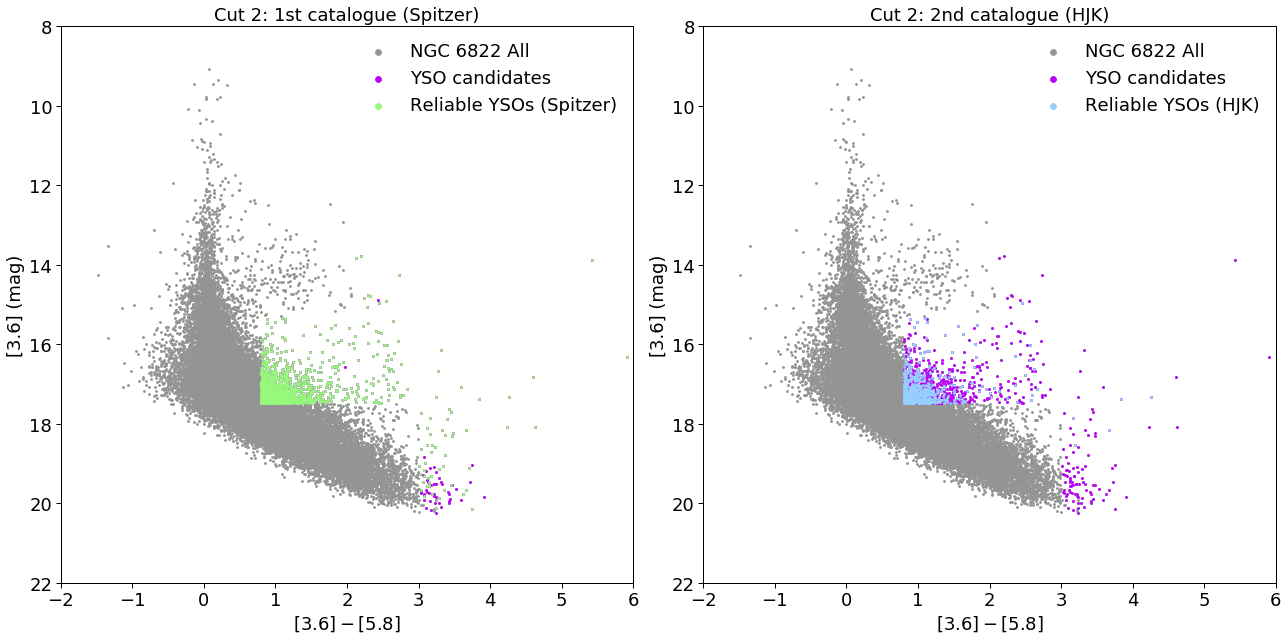

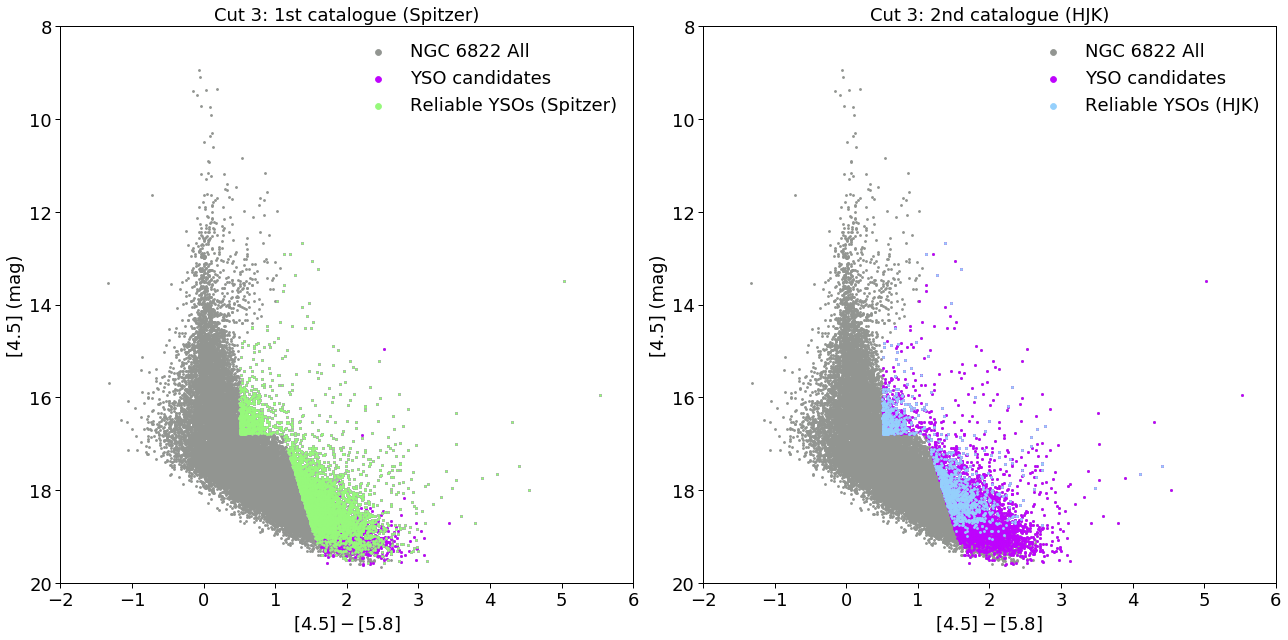

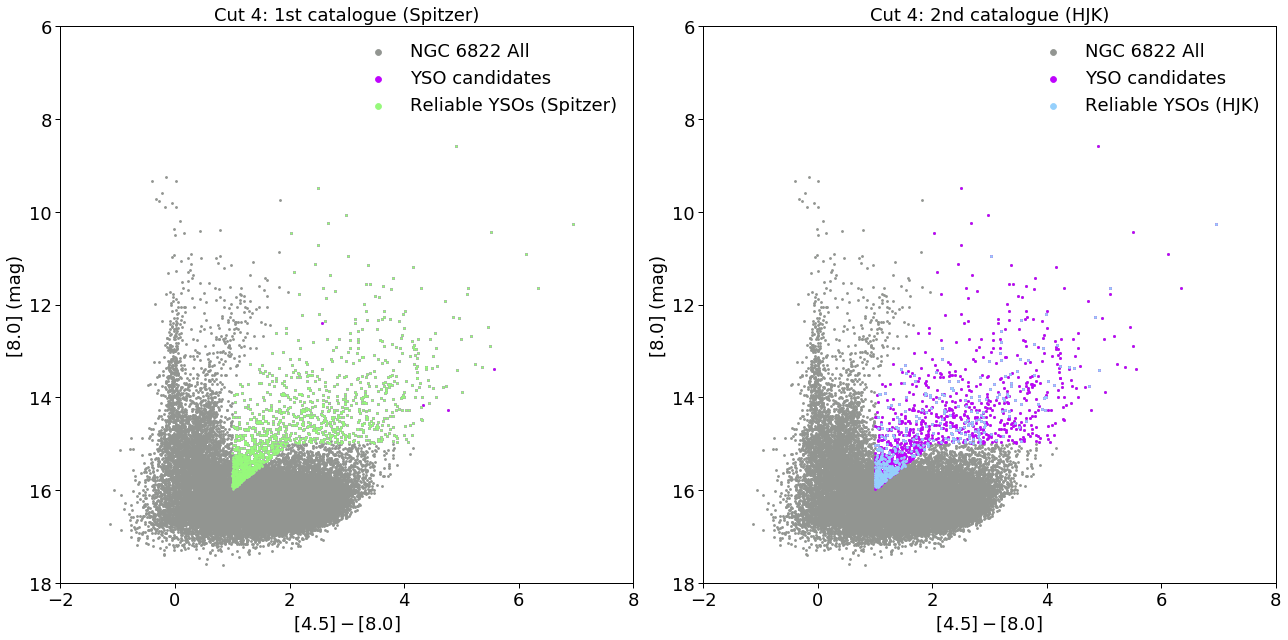

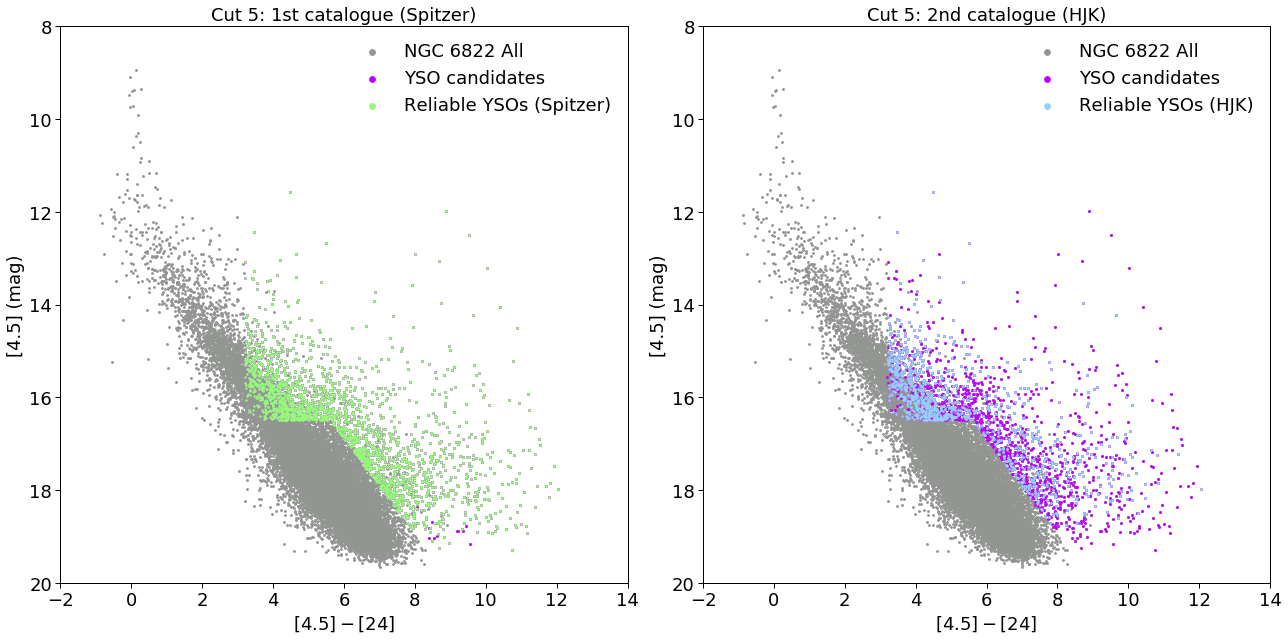

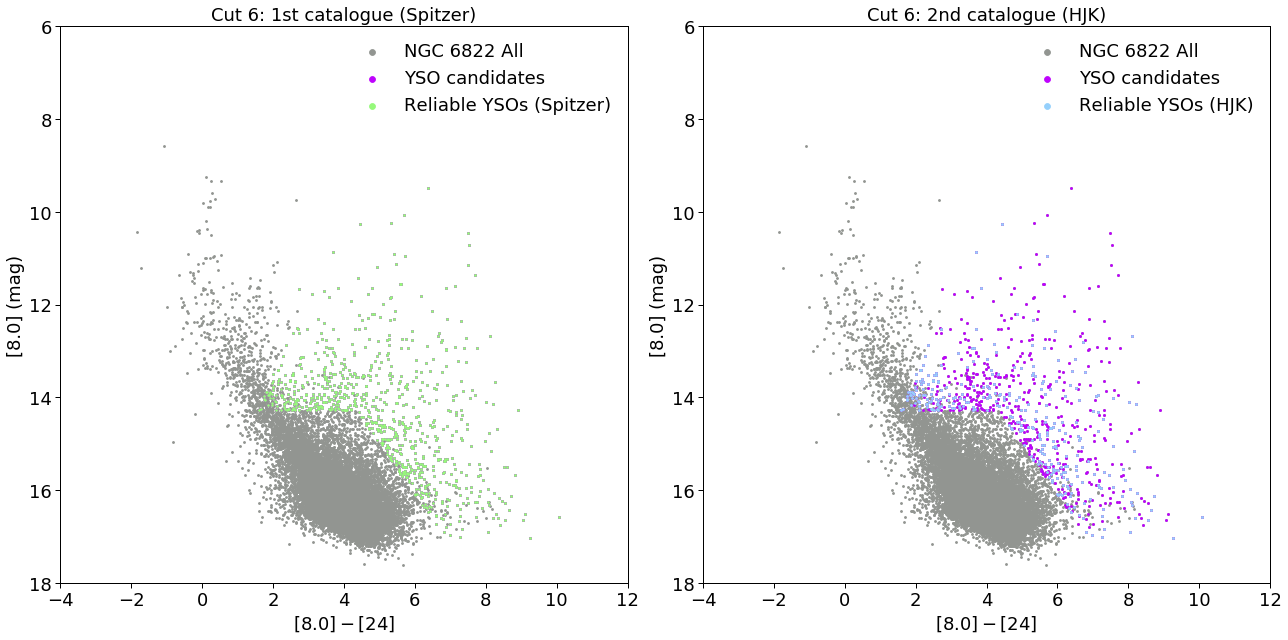

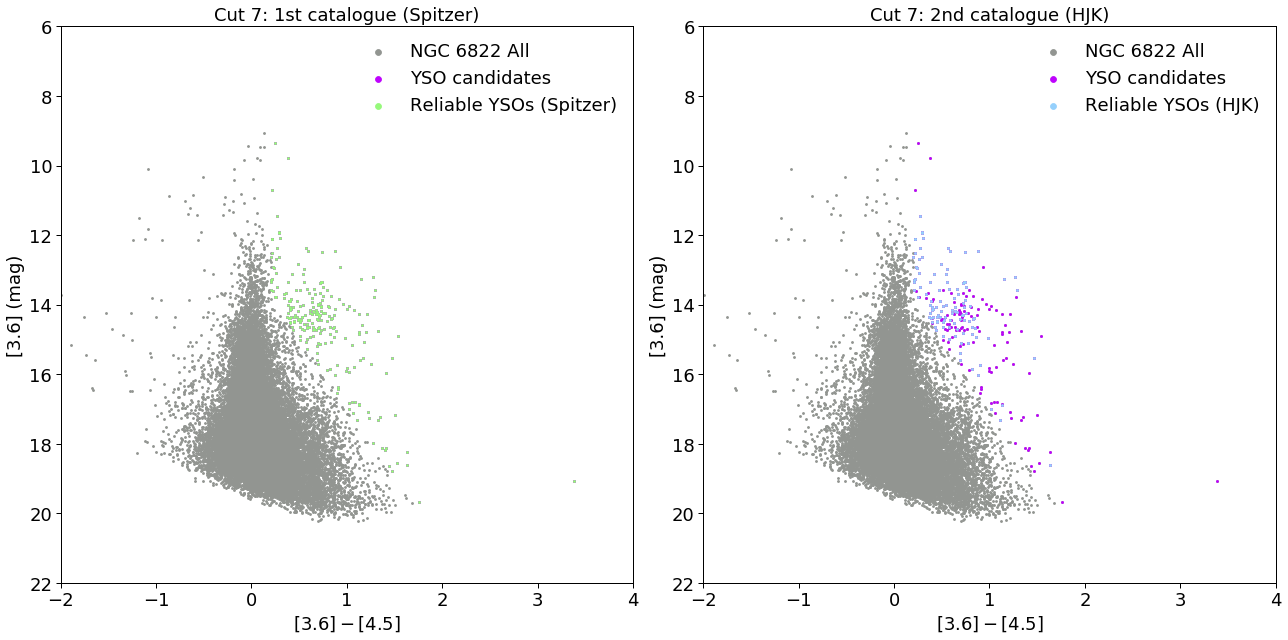

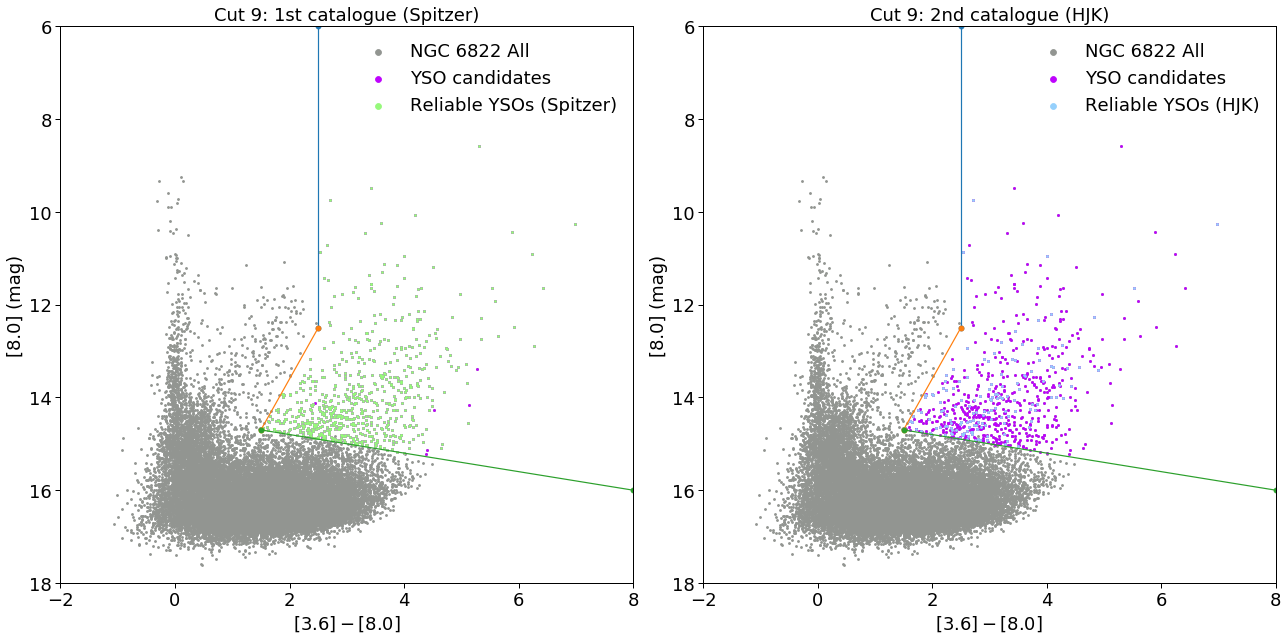

In [8]:
def CMD(A,B,C,all_idx,sp_idx,HJK_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B]-data[C], data[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_sp_cat[B][sp_idx]-reliable_sp_cat[C][sp_idx], reliable_sp_cat[A][sp_idx], s=3.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 1st catalogue (Spitzer)', fontsize=18)
    
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.scatter(data[B]-data[C], data[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_HJK_cat[B][HJK_idx]-reliable_HJK_cat[C][HJK_idx], reliable_HJK_cat[A][HJK_idx], s=3.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (HJK)', fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
def CMD_lines(A,B,C,all_idx,sp_idx,HJK_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B]-data[C], data[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_sp_cat[B][sp_idx]-reliable_sp_cat[C][sp_idx], reliable_sp_cat[A][sp_idx], s=3.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

    x1,y1=[2.5,2.5],[6,12.5]
    x2,y2=[2.5,1.5],[12.5,14.7]
    x3,y3=[1.5,8],[14.7,16]
    plt.plot(x1,y1,x2,y2,x3,y3,marker='o')
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 1st catalogue (Spitzer)', fontsize=18)
    
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.scatter(data[B]-data[C], data[A], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_HJK_cat[B][HJK_idx]-reliable_HJK_cat[C][HJK_idx], reliable_HJK_cat[A][HJK_idx], s=3.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")
    
    x1,y1=[2.5,2.5],[6,12.5]
    x2,y2=[2.5,1.5],[12.5,14.7]
    x3,y3=[1.5,8],[14.7,16]
    plt.plot(x1,y1,x2,y2,x3,y3,marker='o')
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (HJK)', fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    
CMD('k36mag','k36mag','k58mag',c2_idx,c2_rel_sp_idx,c2_rel_HJK_idx,'2','$[3.6] -[5.8]$','[3.6] (mag)',(-2,6),(22,8))
CMD('k45mag','k45mag','k58mag',c3_idx,c3_rel_sp_idx,c3_rel_HJK_idx,'3','$[4.5] -[5.8]$','[4.5] (mag)',(-2,6),(20,8))
CMD('k80mag','k45mag','k80mag',c4_idx,c4_rel_sp_idx,c4_rel_HJK_idx,'4','$[4.5] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))
CMD('k45mag','k45mag','k24mag',c5_idx,c5_rel_sp_idx,c5_rel_HJK_idx,'5','$[4.5] -[24]$','[4.5] (mag)',(-2,14),(20,8))
CMD('k80mag','k80mag','k24mag',c6_idx,c6_rel_sp_idx,c6_rel_HJK_idx,'6','$[8.0] -[24]$','[8.0] (mag)',(-4,12),(18,6))
CMD('k36mag','k36mag','k45mag',c7_idx,c7_rel_sp_idx,c7_rel_HJK_idx,'7','$[3.6] -[4.5]$','[3.6] (mag)',(-2,4),(22,6))
CMD_lines('k80mag','k36mag','k80mag',c9_idx,c9_rel_sp_idx,c9_rel_HJK_idx,'9','$[3.6] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))


# LOCATION PLOTS

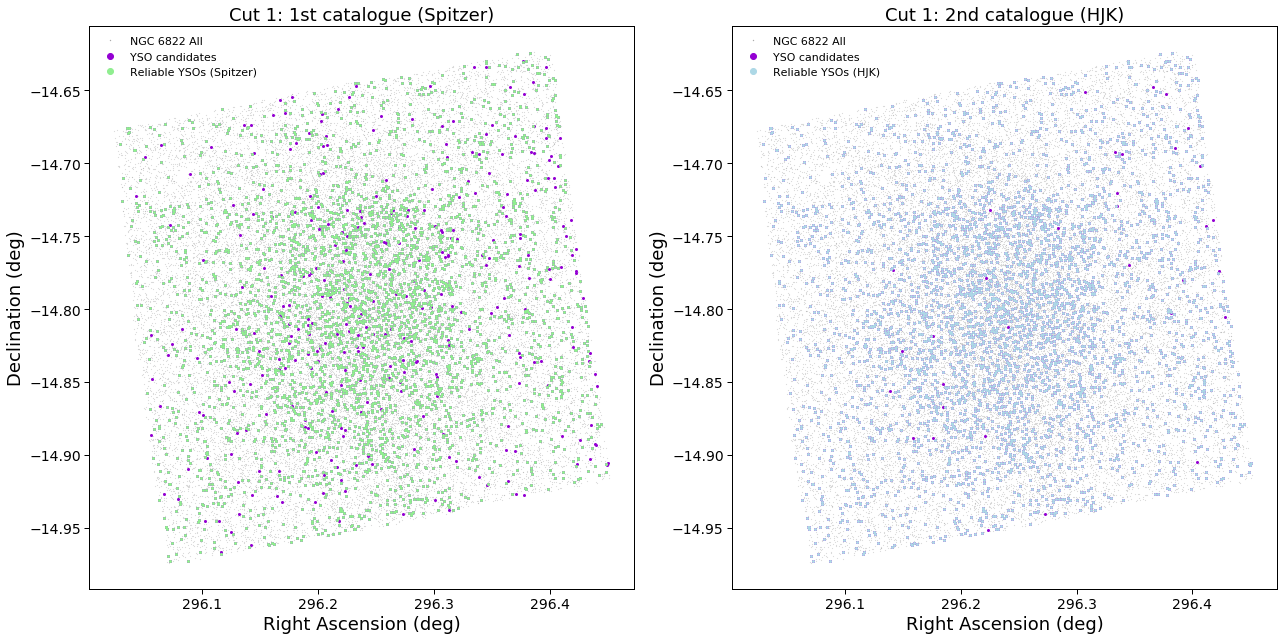

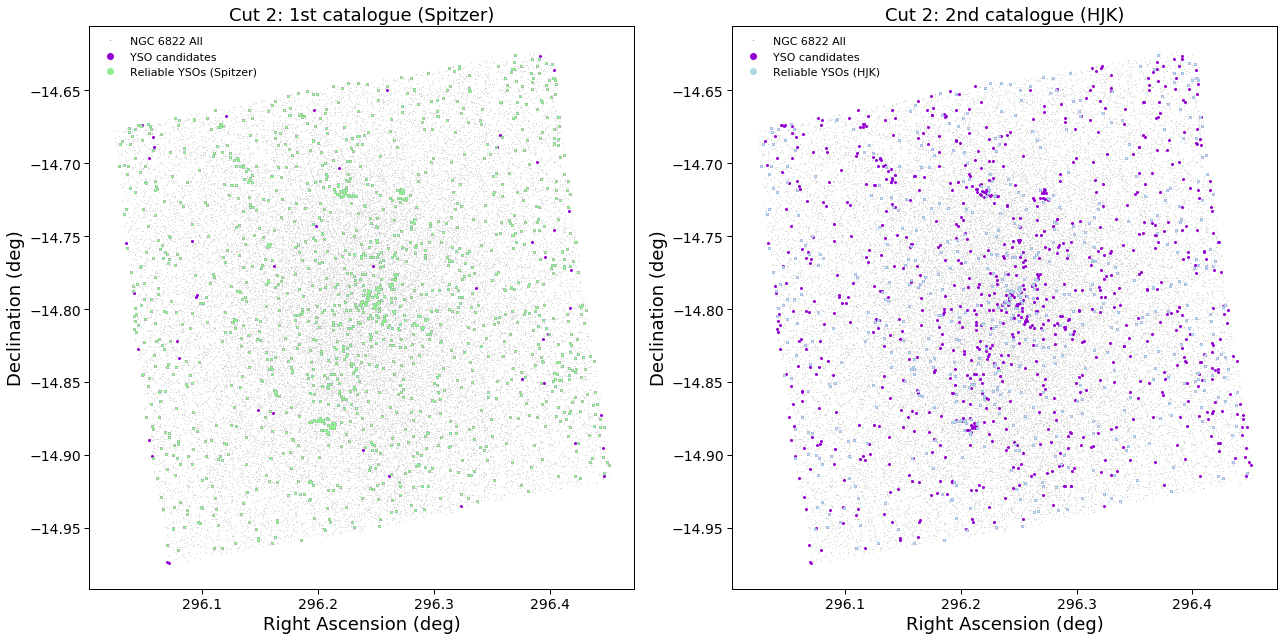

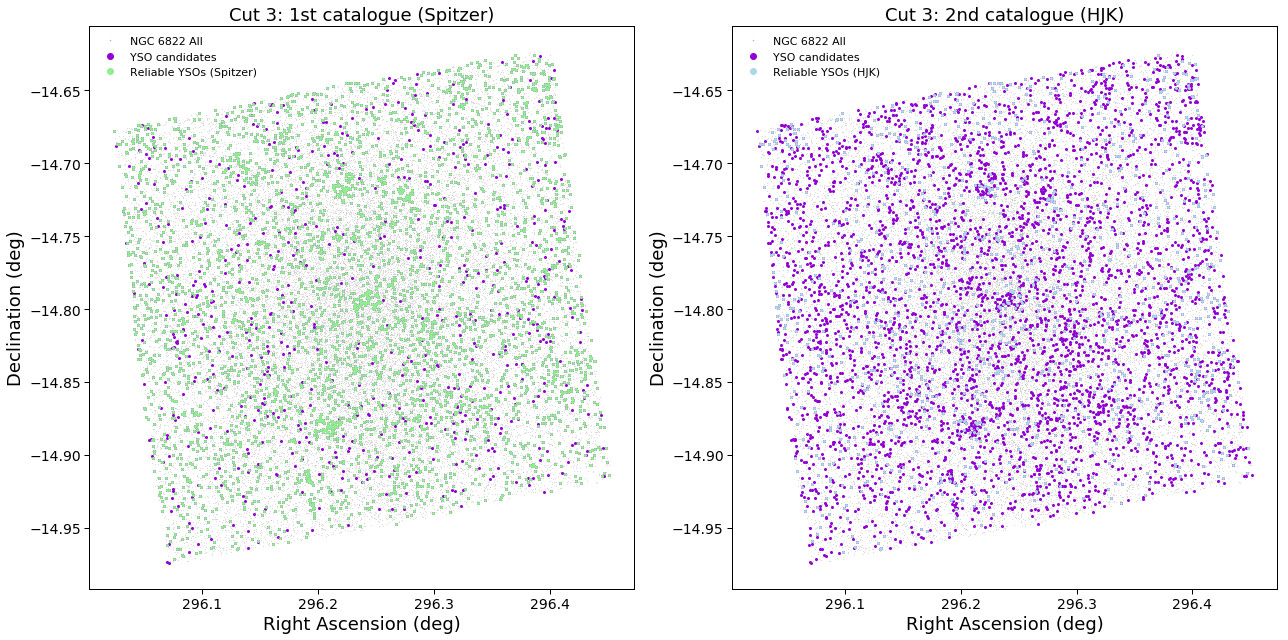

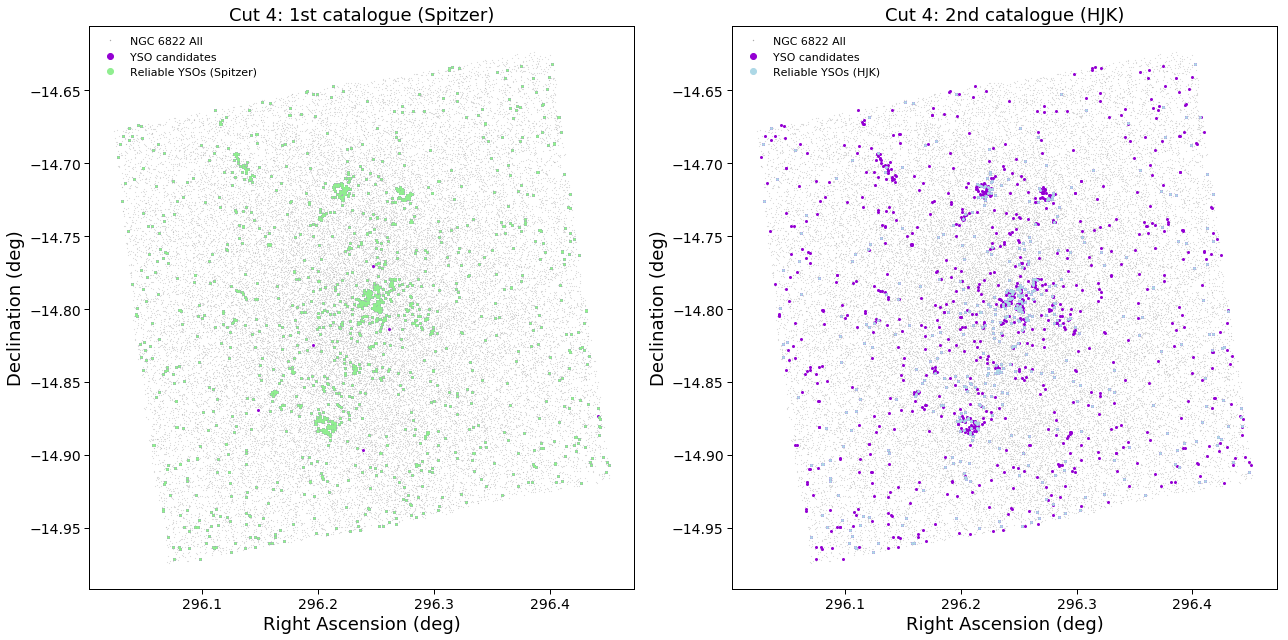

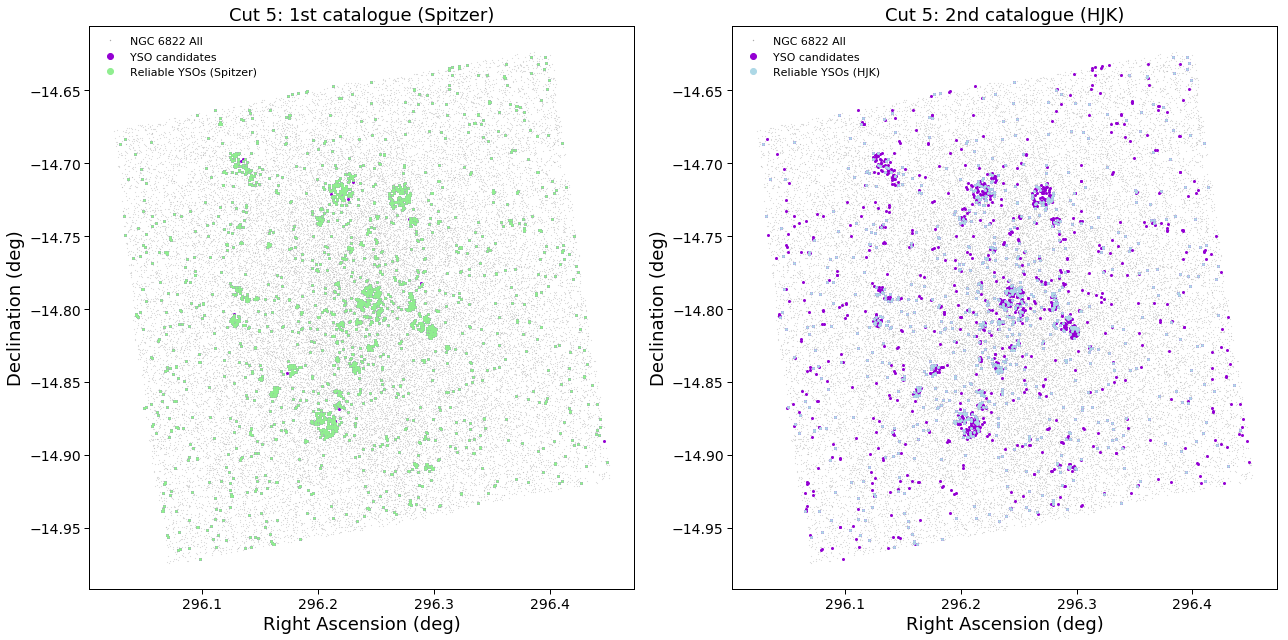

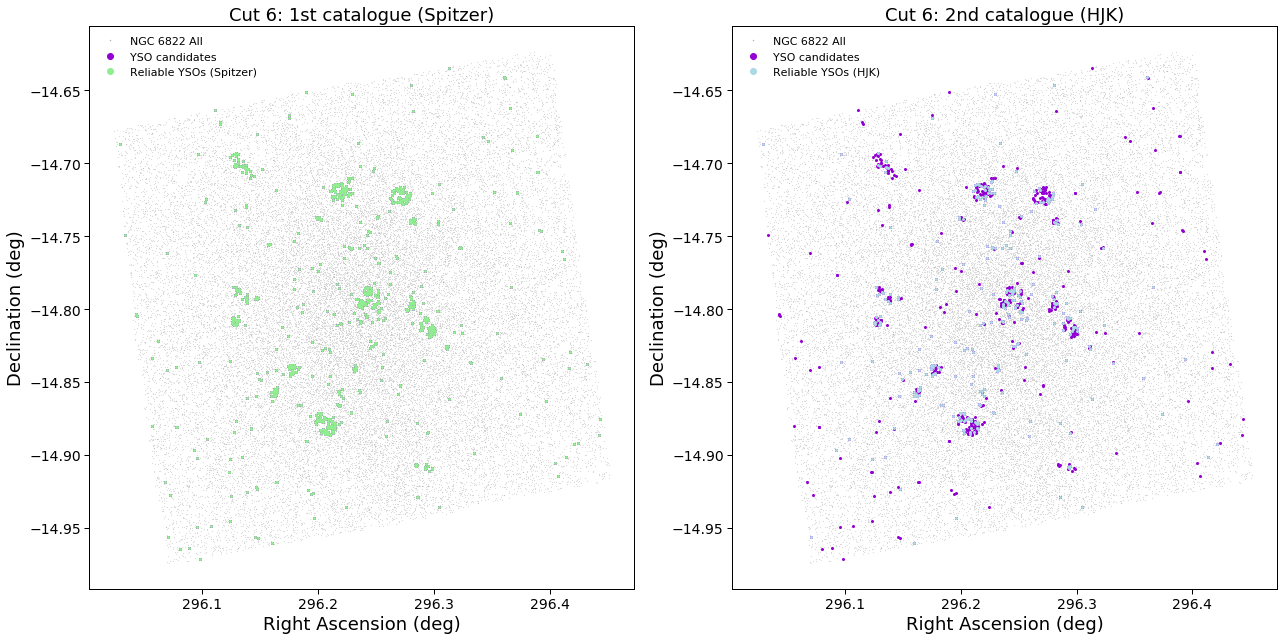

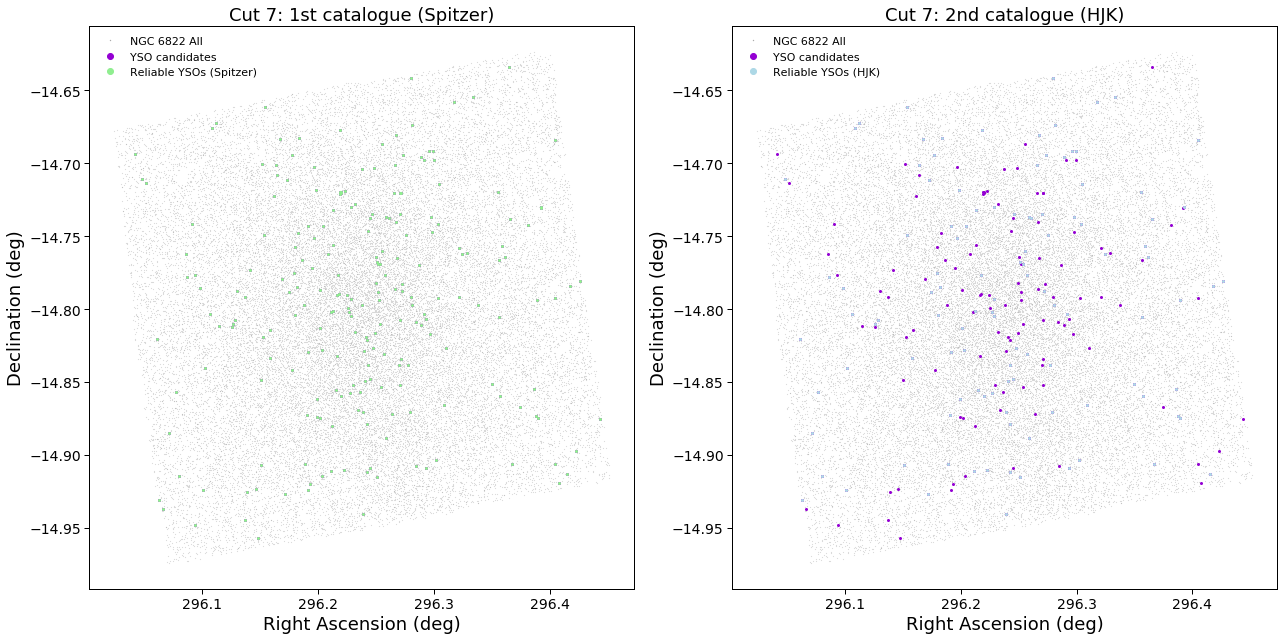

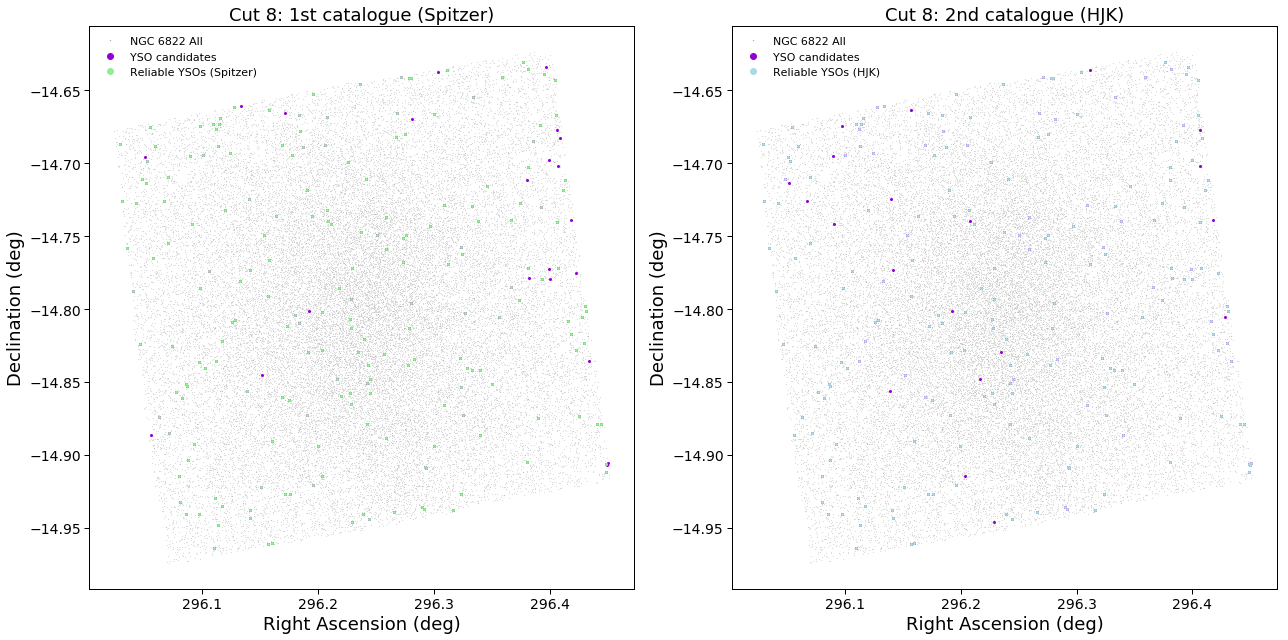

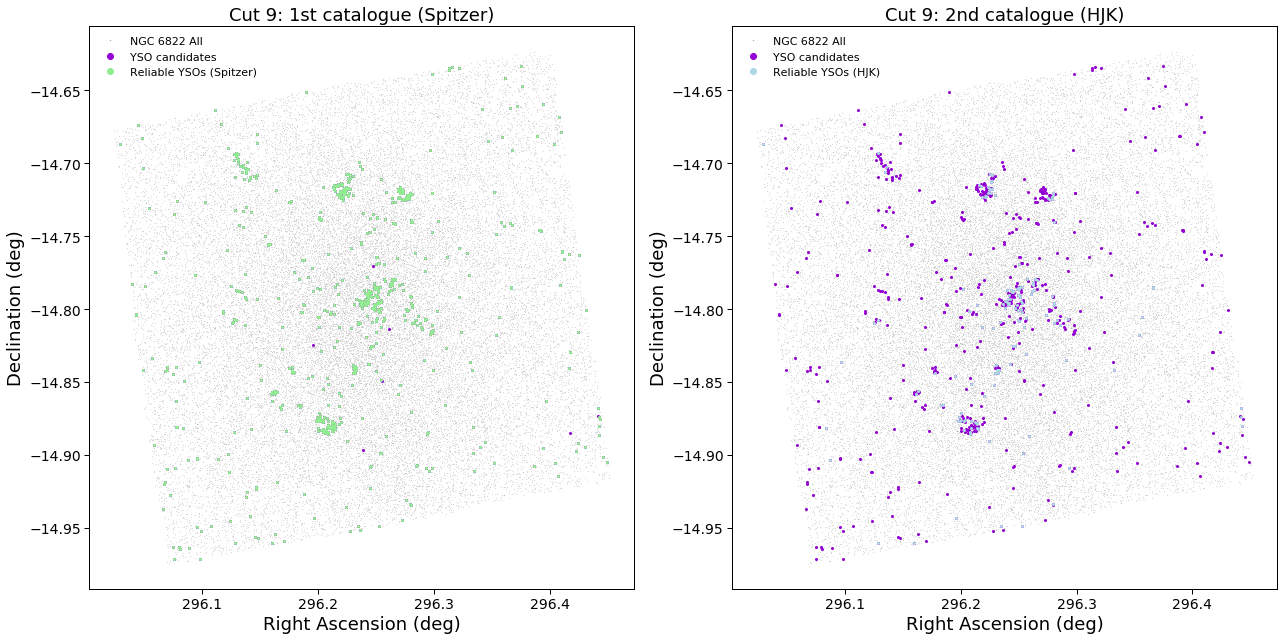

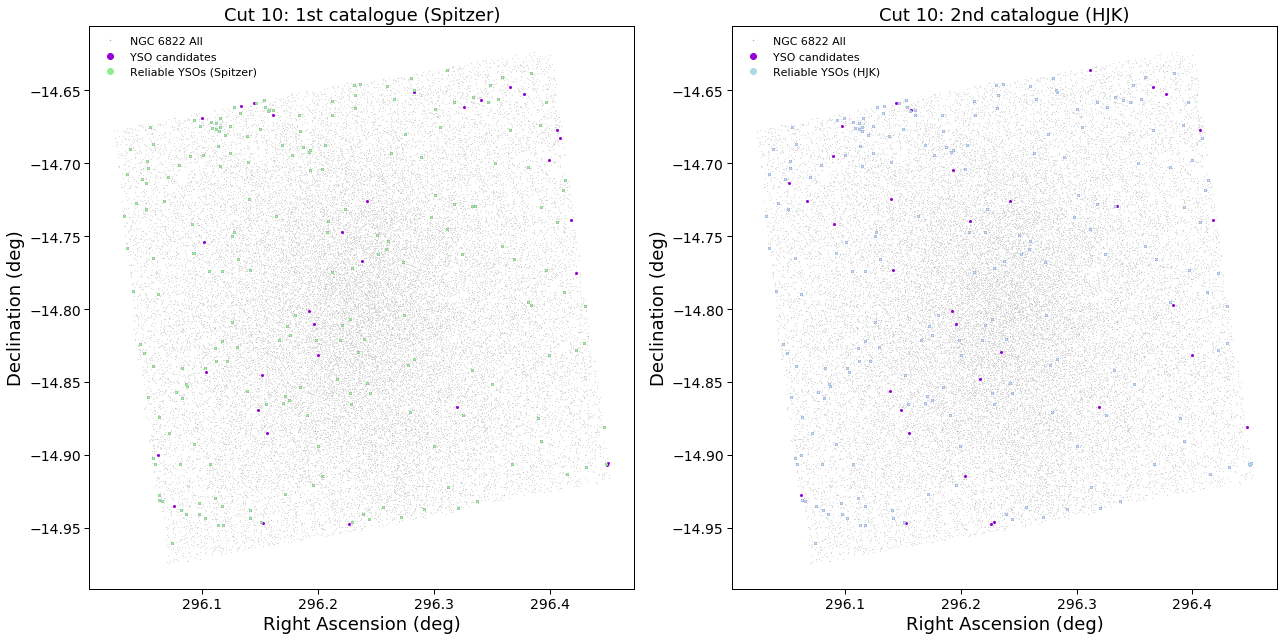

In [9]:
def location_plot(all_idx,sp_idx,HJK_idx,num):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    # Over plot sources with [24] data
    #plt.plot(data['RA'][MIPS24_idx], data['Dec'][MIPS24_idx], '.', color='orange', ms=4, label="[24] source")
    
    #Over plot sensible sources which make the colour cut criteria
    plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_sp_cat['RA'][sp_idx], reliable_sp_cat['Dec'][sp_idx], '.', color='lightgreen', ms=4, label="Reliable YSOs (Spitzer)")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 1st catalogue (Spitzer)',fontsize=18)
    
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    # Over plot sources with [24] data
    #plt.plot(data['RA'][MIPS24_idx], data['Dec'][MIPS24_idx], '.', color='orange', ms=4, label="[24] source")
    
    #Over plot sensible sources which make the colour cut criteria
    plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    plt.plot(reliable_HJK_cat['RA'][HJK_idx], reliable_HJK_cat['Dec'][HJK_idx], '.', color='lightblue', ms=4, label="Reliable YSOs (HJK)")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (HJK)',fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

location_plot(c1_idx,c1_rel_sp_idx,c1_rel_HJK_idx,'1')
location_plot(c2_idx,c2_rel_sp_idx,c2_rel_HJK_idx,'2')
location_plot(c3_idx,c3_rel_sp_idx,c3_rel_HJK_idx,'3')
location_plot(c4_idx,c4_rel_sp_idx,c4_rel_HJK_idx,'4')
location_plot(c5_idx,c5_rel_sp_idx,c5_rel_HJK_idx,'5')
location_plot(c6_idx,c6_rel_sp_idx,c6_rel_HJK_idx,'6')
location_plot(c7_idx,c7_rel_sp_idx,c7_rel_HJK_idx,'7')
location_plot(c8_idx,c8_rel_sp_idx,c8_rel_HJK_idx,'8')
location_plot(c9_idx,c9_rel_sp_idx,c9_rel_HJK_idx,'9')
location_plot(c10_idx,c10_rel_sp_idx,c10_rel_HJK_idx,'10')

#Failed Hess function

def Hess(A,B,C,colmin,colmax,colbin,magmin,magmax,magbin,xlims,ylims):
    #Defining the magnitude and color for the entire catalogue
    color = data[B]-data[C] 
    mag2= data[A]
    
    #Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
    coledges = np.linspace(colmin,colmax,colbin) #(min, max, nbins)
    magedges = np.linspace(magmin,magmax,magbin)
    extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]
    
    #2D histogram
    numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
    numH[0][numH[0] == 0] = np.nan
    numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

    #Setting up figure, 6"x5" in this case
    fig = plt.figure(figsize=(18,9))

    plt.clf()      #clears plot area
    ax = plt.gca() #sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)

    #Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
    plt.setp(ax,xlim=xlims,ylim=ylims,xlabel='[3.6]-[5.8]',ylabel='[3.6] (mag)')


    #Show the image (the 2D histogram)
    im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

    im.set_clim(0,1.5)         #clipping values of the image to show.
    im.set_cmap('gist_yarg')   #choosing a color map
    plt.scatter(data[B][c2_idx]-data[C][c2_idx], data[A][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('CutCutCut 2')
    
    
Hess('k36mag','k36mag','k58mag',-2.0,8,50,8,22,50,(-2,6),(22,8))
    


# HESS DIAGRAMS

Text(0.5,1,'Cut 2: HJK')

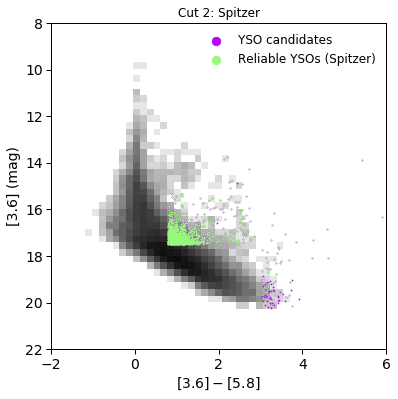

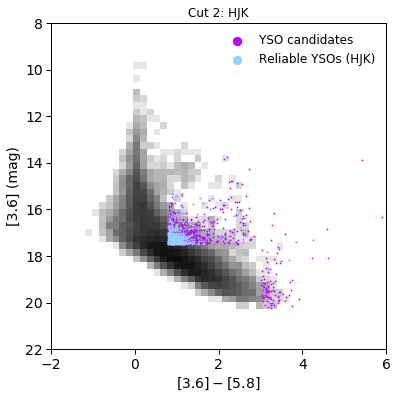

In [128]:
#3658 Spitzer
#Defining the magnitude and color
color = data['k36mag']-data['k58mag'] 
mag2= data['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[22,8],
         xlabel='$[3.6] - [5.8]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k36mag'][c2_rel_sp_idx]-reliable_sp_cat['k58mag'][c2_rel_sp_idx], reliable_sp_cat['k36mag'][c2_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 2: Spitzer',fontsize=12)



#3658 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[22,8],
         xlabel='$[3.6] - [5.8]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k36mag'][c2_rel_HJK_idx]-reliable_HJK_cat['k58mag'][c2_rel_HJK_idx], reliable_HJK_cat['k36mag'][c2_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 2: HJK',fontsize=12)

Text(0.5,1,'Cut 3: HJK')

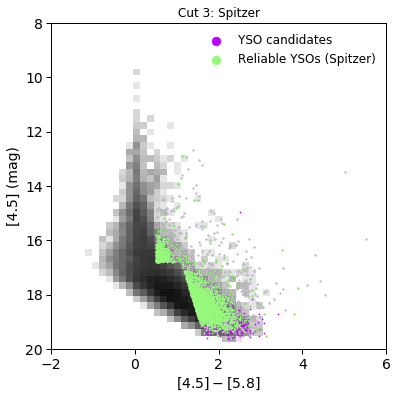

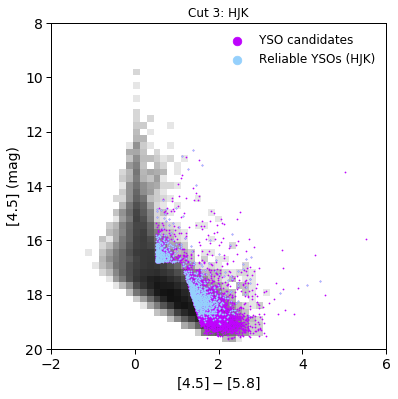

In [129]:
#4558 Spitzer
#Defining the magnitude and color
color = data['k45mag']-data['k58mag'] 
mag2= data['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[20,8],
         xlabel='$[4.5] - [5.8]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k45mag'][c3_rel_sp_idx]-reliable_sp_cat['k58mag'][c3_rel_sp_idx], reliable_sp_cat['k45mag'][c3_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 3: Spitzer',fontsize=12)



#4558 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,6],
         ylim=[20,8],
         xlabel='$[4.5] - [5.8]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k45mag'][c3_rel_HJK_idx]-reliable_HJK_cat['k58mag'][c3_rel_HJK_idx], reliable_HJK_cat['k45mag'][c3_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 3: HJK',fontsize=12)

Text(0.5,1,'Cut 4: HJK')

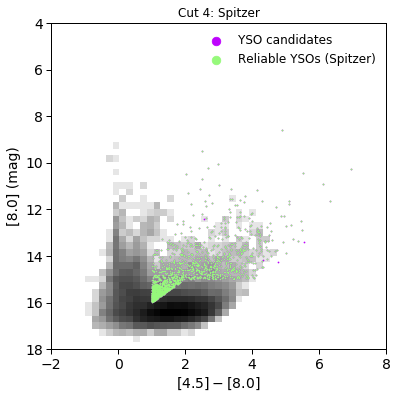

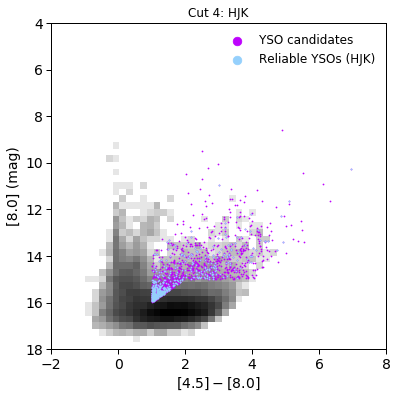

In [130]:
#4580 Spitzer
#Defining the magnitude and color
color = data['k45mag']-data['k80mag'] 
mag2= data['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(4, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,4],
         xlabel='$[4.5] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k45mag'][c4_rel_sp_idx]-reliable_sp_cat['k80mag'][c4_rel_sp_idx], reliable_sp_cat['k80mag'][c4_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 4: Spitzer',fontsize=12)



#4580 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,4],
         xlabel='$[4.5] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k45mag'][c4_rel_HJK_idx]-reliable_HJK_cat['k80mag'][c4_rel_HJK_idx], reliable_HJK_cat['k80mag'][c4_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 4: HJK',fontsize=12)

Text(0.5,1,'Cut 5: HJK')

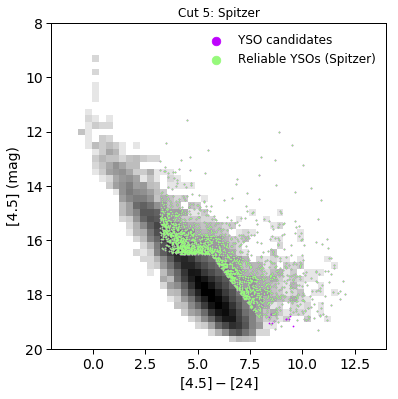

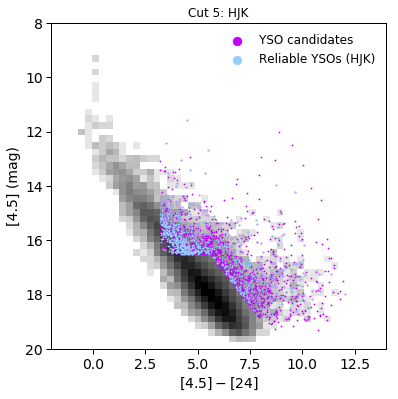

In [131]:
#4524 Spitzer
#Defining the magnitude and color
color = data['k45mag']-data['k24mag'] 
mag2= data['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 14, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,14],
         ylim=[20,8],
         xlabel='$[4.5] - [24]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k45mag'][c5_rel_sp_idx]-reliable_sp_cat['k24mag'][c5_rel_sp_idx], reliable_sp_cat['k45mag'][c5_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 5: Spitzer',fontsize=12)



#4524 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,14],
         ylim=[20,8],
         xlabel='$[4.5] - [24]$',
         ylabel='[4.5] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k45mag'][c5_rel_HJK_idx]-reliable_HJK_cat['k24mag'][c5_rel_HJK_idx], reliable_HJK_cat['k45mag'][c5_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 5: HJK',fontsize=12)

Text(0.5,1,'Cut 6: HJK')

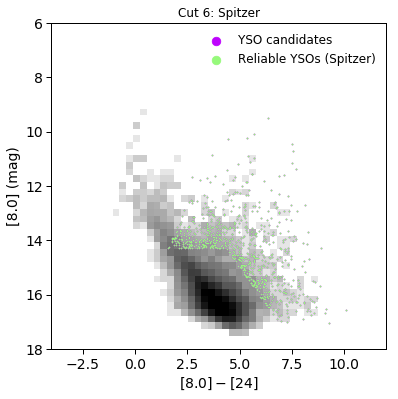

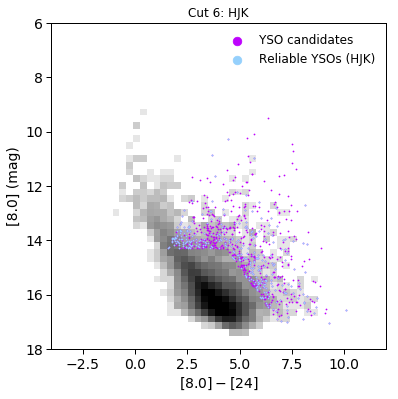

In [132]:
#8024 Spitzer
#Defining the magnitude and color
color = data['k80mag']-data['k24mag'] 
mag2= data['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4.0, 12, 50) #(min, max, nbins)
magedges = np.linspace(6, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,12],
         ylim=[18,6],
         xlabel='$[8.0] - [24]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k80mag'][c6_rel_sp_idx]-reliable_sp_cat['k24mag'][c6_rel_sp_idx], reliable_sp_cat['k80mag'][c6_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 6: Spitzer',fontsize=12)



#8024 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,12],
         ylim=[18,6],
         xlabel='$[8.0] - [24$]',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k80mag'][c6_rel_HJK_idx]-reliable_HJK_cat['k24mag'][c6_rel_HJK_idx], reliable_HJK_cat['k80mag'][c6_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 6: HJK',fontsize=12)

Text(0.5,1,'Cut 7: HJK')

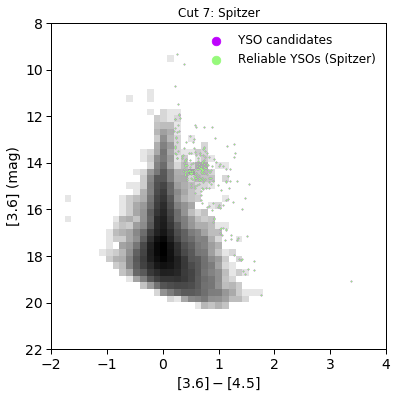

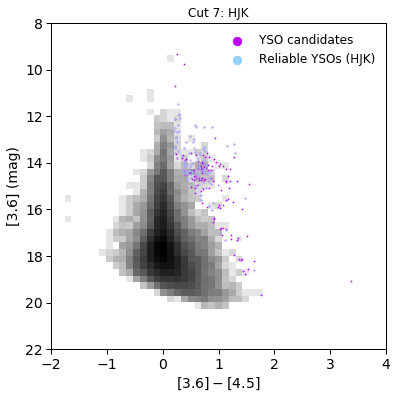

In [133]:
#3645 Spitzer
#Defining the magnitude and color
color = data['k36mag']-data['k45mag'] 
mag2= data['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 4, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,4],
         ylim=[22,8],
         xlabel='$[3.6] - [4.5]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c7_idx]-data['k45mag'][c7_idx], data['k36mag'][c7_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k36mag'][c7_rel_sp_idx]-reliable_sp_cat['k45mag'][c7_rel_sp_idx], reliable_sp_cat['k36mag'][c7_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 7: Spitzer',fontsize=12)



#3645 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,4],
         ylim=[22,8],
         xlabel='$[3.6] - [4.5]$',
         ylabel='[3.6] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c7_idx]-data['k45mag'][c7_idx], data['k36mag'][c7_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k36mag'][c7_rel_HJK_idx]-reliable_HJK_cat['k45mag'][c7_rel_HJK_idx], reliable_HJK_cat['k36mag'][c7_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 7: HJK',fontsize=12)

Text(0.5,1,'Cut 7: HJK')

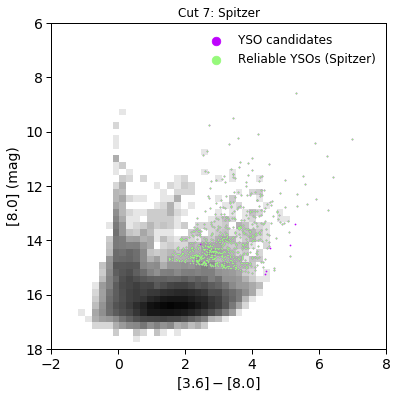

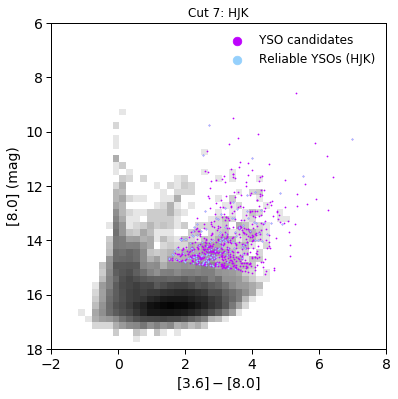

In [134]:
#3680 Spitzer
#Defining the magnitude and color
color = data['k36mag']-data['k80mag'] 
mag2= data['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(6, 18, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,6],
         xlabel='$[3.6] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_sp_cat['k36mag'][c9_rel_sp_idx]-reliable_sp_cat['k80mag'][c9_rel_sp_idx], reliable_sp_cat['k80mag'][c9_rel_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 7: Spitzer',fontsize=12)



#3680 HJK

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,6))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[18,6],
         xlabel='$[3.6] - [8.0]$',
         ylabel='[8.0] (mag)')
#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_HJK_cat['k36mag'][c9_rel_HJK_idx]-reliable_HJK_cat['k80mag'][c9_rel_HJK_idx], reliable_HJK_cat['k80mag'][c9_rel_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

# Add a legend and a title
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.,fontsize=12)
plt.title('Cut 7: HJK',fontsize=12)

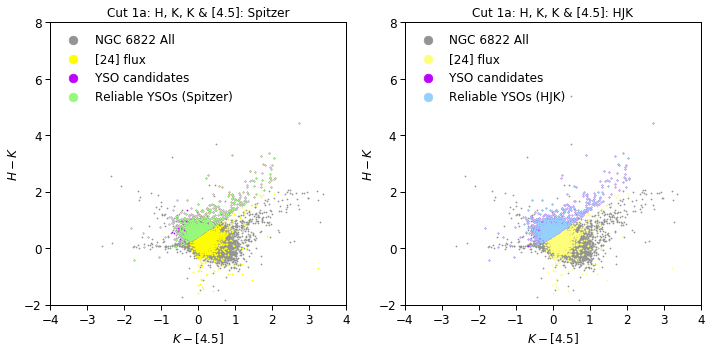

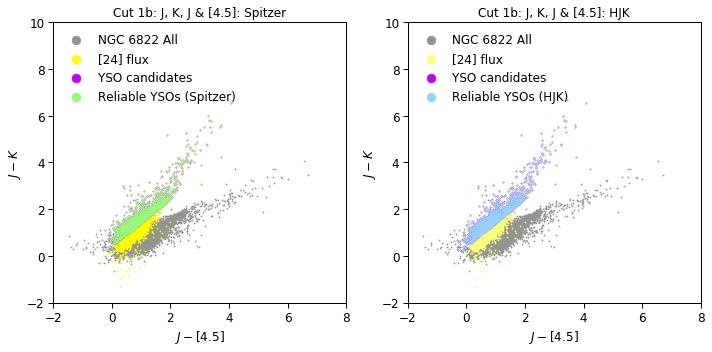

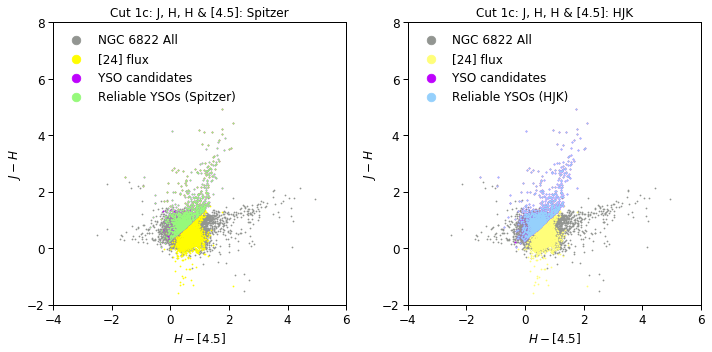

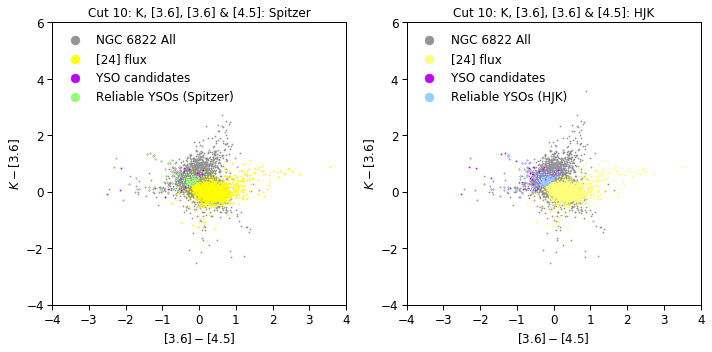

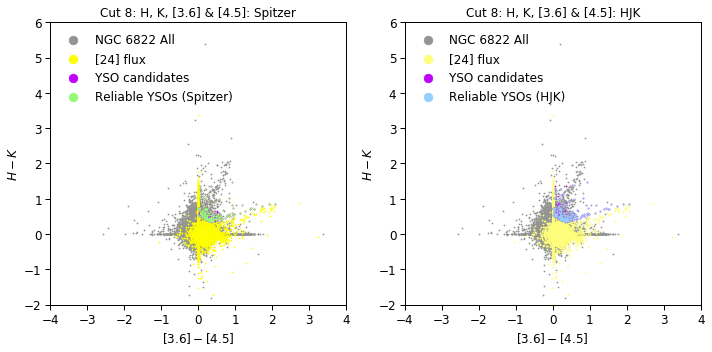

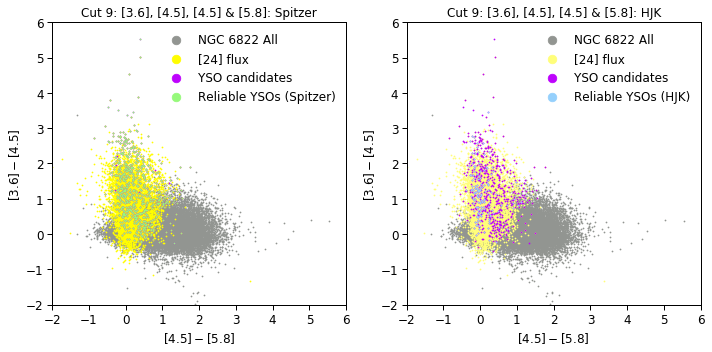

In [11]:
#CCDs
#produce CCD for [a]-[b]vs.[c]-[d] with corresponding column titles

def ccd(cut,A,B,C,D,all_idx,cut_sp_idx,cut_HJK_idx,a,b,c,d,xlimits,ylimits,pos):
    # Setting up plotting sizes
    plt.rc('font', family='sans-serif')
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("axes", labelsize=12)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults() # Resets the parameters to their default values

    # Setting up figure
    fig = plt.figure(figsize=(10, 5))
    ax = plt.gca()  # Sets up active plot region

    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Plot everything
    plt.scatter(data[C]-data[D], data[A]-data[B], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot 24 flux stars
    plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] flux")
    # Plot only sensible stars which satify the cut criteria
    plt.scatter(data[A][all_idx]-data[B][all_idx], data[C][all_idx]-data[D][all_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    #Plot only reliable catalogue
    plt.scatter(reliable_sp_cat[A][cut_sp_idx]-reliable_sp_cat[B][cut_sp_idx], reliable_sp_cat[C][cut_sp_idx]-reliable_sp_cat[D][cut_sp_idx], s=0.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs (Spitzer)")
    
    plt.xlim(xlimits[0],xlimits[1])
    plt.ylim(ylimits[0],ylimits[1])
    
    # Set the axis lables
    x_label = '$'+c+' - '+d+'$'
    y_label = '$'+a+' - '+b+'$'
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend and a title
    plt.legend(loc=pos,frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('Cut '+cut+': '+a+', '+b+', '+c+' & '+d+': Spitzer',fontsize=12)

    
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Plot everything
    plt.scatter(data[C]-data[D], data[A]-data[B], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot 24 flux stars
    plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['light yellow'], label="[24] flux")
    # Plot only sensible stars which satify the cut criteria
    plt.scatter(data[A][all_idx]-data[B][all_idx], data[C][all_idx]-data[D][all_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    #Plot only reliable catalogue
    plt.scatter(reliable_HJK_cat[A][cut_HJK_idx]-reliable_HJK_cat[B][cut_HJK_idx], reliable_HJK_cat[C][cut_HJK_idx]-reliable_HJK_cat[D][cut_HJK_idx], s=0.9,color=sns.xkcd_rgb['light blue'], label="Reliable YSOs (HJK)")

    plt.xlim(xlimits[0],xlimits[1])
    plt.ylim(ylimits[0],ylimits[1])
    
    # Set the axis lables
    x_label = '$'+c+' - '+d+'$'
    y_label = '$'+a+' - '+b+'$'
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend and a title
    plt.legend(loc=pos,frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('Cut '+cut+': '+a+', '+b+', '+c+' & '+d+': HJK',fontsize=12)
    
    
    fig.tight_layout()
    #plt.savefig("bla.pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    

ccd('1a','Hmag','Kmag','Kmag','k45mag',c1a_idx,c1a_rel_sp_idx,c1a_rel_HJK_idx,'H','K','K','[4.5]',[-4,4],[-2,8],'upper left')
ccd('1b','Jmag','Kmag','Jmag','k45mag',c1b_idx,c1b_rel_sp_idx,c1b_rel_HJK_idx,'J','K','J','[4.5]',[-2,8],[-2,10],'upper left')
ccd('1c','Jmag','Hmag','Hmag','k45mag',c1c_idx,c1c_rel_sp_idx,c1c_rel_HJK_idx,'J','H','H','[4.5]',[-4,6],[-2,8],'upper left')
#ccd('k36mag','k45mag','k58mag','k80mag',idx_ysoish_36455880,'[3.6]','[4.5]','[5.8]','[8.0]',[-6,8],[-4,6])
ccd('10','Kmag','k36mag','k36mag','k45mag',c10_idx,c10_rel_sp_idx,c10_rel_HJK_idx,'K','[3.6]','[3.6]','[4.5]',[-4,4],[-4,6],'upper left')
ccd('8','Hmag','Kmag','k36mag','k45mag',c8_idx,c8_rel_sp_idx,c8_rel_HJK_idx,'H','K','[3.6]','[4.5]',[-4,4],[-2,6],'upper left')
ccd('9','k36mag','k45mag','k45mag','k58mag',c9_idx,c9_rel_sp_idx,c9_rel_HJK_idx,'[3.6]','[4.5]','[4.5]','[5.8]',[-2,6],[-2,6],'upper right')


In [136]:
#ascii.write(data, 'NGC6822_Full_Statistics.csv', format='csv', fast_writer=False)